In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:

df = pd.read_csv("./data/bank_data.csv")
df=df.head(200)
#Create a column "profit" :
df["profit"] = df["money"]/df["time (hr)"]
df

new_row = {'id':'safe_zone', 'x_coordi':87, 'chemistry':92}
print(df)
#Calculate distance from 0(0,0):
df['distance'] = (df['x_coordinate']**2+df['y_coordinate']**2)**0.2
df2 = df[['x_coordinate','y_coordinate','profit']]
#df2 = df2.head(100)
print(df)



      id  x_coordinate  y_coordinate  money  time (hr)         profit
0      0      2.851925      1.201712  29700   0.273403  108630.921470
1      1      4.150372     -2.654334   6500   0.064040  101499.543603
2      2     -1.494092     -1.230419  89400   0.127458  701405.770444
3      3      1.271326     -0.088520  96100   1.315029   73078.228687
4      4      2.471113     -0.592810  41100   0.164393  250010.909373
..   ...           ...           ...    ...        ...            ...
195  195      4.740699      2.447793  16100   0.286438   56207.635088
196  196     -1.270346     -1.061893   2700   1.176646    2294.658266
197  197      2.400900      0.279276  69200   0.242649  285185.769394
198  198     -1.241353      1.413377  13100   1.115647   11742.068041
199  199     -1.043423      0.231220  72500   0.425828  170256.626737

[200 rows x 6 columns]
      id  x_coordinate  y_coordinate  money  time (hr)         profit  \
0      0      2.851925      1.201712  29700   0.273403  108630.

In [4]:
df.describe()

,id,x_coordinate,y_coordinate,money,time (hr),profit,distance
count,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000
mean,99.500000,0.197708,-0.203575,19381.000000,0.728368,6.559776e+04,1.672878
std,57.879185,2.917561,2.849995,26452.518171,0.415922,2.641689e+05,0.287215
min,0.000000,-4.993767,-4.949721,100.000000,0.007218,7.078966e+01,0.752259
25%,49.750000,-2.116065,-2.656409,1100.000000,0.388423,2.112265e+03,1.512999
50%,99.500000,0.007496,-0.417305,5600.000000,0.748253,1.140841e+04,1.720289
75%,149.250000,2.819484,2.131379,29850.000000,1.098958,5.141707e+04,1.869699
max,199.000000,4.996904,4.964229,99500.000000,1.494952,2.673887e+06,2.165584



- Calculate profit/time to find the most profitable bank to rob 
- Approaches :
    1. start at the most profitable bank then finish at the end 0(0,0) (quality over quantity)
        - greedy method: get all the most profitable banks within 24hr 
    2. steal the most banks possible within 24hr around the point 0(0,0) (quantity over quality)
    3. optimize between 2 approaches above (maximize the profit and numbers of banks) : 
        - calculate the distance from 0(0,0) to banks location (create new distance column)
        - use heatmap to locate where the most profitable banks are (profit / distance) then focus on that area:
            + condition: not too far from 0(0,0) but have good profit


=> compare all approaches and keep the best one 

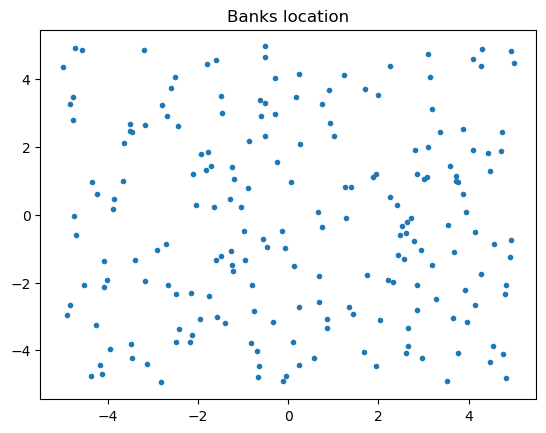

In [5]:
# plotting the points 
fig = plt.scatter(df['x_coordinate'], df['y_coordinate'], marker = ".")

plt.title('Banks location')

plt.show()

In [6]:
def coordinate(x):
    """Find the coordinate for each bank based on index"""
    coor = []
    coor_x = df.iloc[x]['x_coordinate']
    coor_y = df.iloc[x]['y_coordinate']
    coor.append(coor_x)
    coor.append(coor_y)
    return coor
coordinate(3) 

[1.2713257776543574, -0.0885204586243504]

In [7]:
def robbing_time(x):
    """Find the robbing time in a bank"""
    return df.iloc[x]['time (hr)']
robbing_time(2)

0.1274583183759543

In [8]:
def distance(p1,p2):
    """Calculate distance between 2 points"""
    p1 = coordinate(p1)
    p2 = coordinate(p2)
    return math.dist(p1, p2)
distance(1,3)

3.856463067796375

In [9]:
def time(p1,p2):
    """Calculate the travel time between 2 points"""
    time = distance(p1,p2)/30 + robbing_time(p2)
    return time 
time(0,1)

0.19966603916403775

In [10]:
def closest_point(points,new):
    """Find the closest bank from the *chosen* bank
       Points = all the banks that we have"""
    best_point= None
    best_distance= None 
    
    for current in points: 
        current_distance = distance(new,current)
        
        if current == new: # to avoid return the same point (bank)
            continue 
         
        if best_distance is None or current_distance < best_distance:
            best_distance = current_distance
            best_point = current
            
    return best_point

closest_point(range(200),4)
            
#Here Im trying to rob all the nearest banks from the safe zone 
#within 24hrs, regardless the value. Next step is to write a 
#recursion algo to add all the banks near the safe zone


173

In [11]:
#find the 1st bank to arrive (closest to the origin): 
first_bank = df[df.distance == df.distance.min()]["id"]
print(first_bank)
print(len(df))

67    67
Name: id, dtype: int64
200


In [12]:
def first_bank(df):
    for i in range(len(df)):
        if df.iloc[i]['distance']== df.distance.min():
            return i
first_bank(df)


67

In [13]:
def distance_first_bank(x):
    return df.iloc[x]['distance']
distance_first_bank(2)

1.3023243618776732

In [14]:
def time_first_bank(x):
    return distance_first_bank(x)/30 + robbing_time(x)
time_first_bank(2)

0.1708691304385434

In [21]:
def rob_bank(df):
    start = first_bank(df)
    result = []
    temp_time = 0
#print(start)
    if temp_time == 0: 
        temp_time += time_first_bank(start)
        result.append(start)
        next_bank = closest_point(range(len(df)), start)
        result.append(next_bank)
        df=df.drop(start)
#    df.drop(next_bank)
    
    while temp_time <= 24 and temp_time>0: 
        current_bank = next_bank
        temp_time += time(current_bank,closest_point(range(len(df)),next_bank))
        next_bank = closest_point(range(len(df)),current_bank)
        df=df.drop(current_bank-len(result))
        result.append(next_bank)
        
    
    else: 
        False
    return result
    
rob_bank(df)

[67,
 191,
 53,
 191,
 53,
 191,
 53,
 191,
 53,
 191,
 53,
 188,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67,
 53,
 67]